               count          mean         std           min           25%  \
Unnamed: 0.1  1112.0    555.500000  321.151055      0.000000    277.750000   
Unnamed: 0    1112.0    556.500000  321.151055      1.000000    278.750000   
SUB_ID        1112.0  50752.684353  447.680666  50002.000000  50354.750000   
X             1112.0    556.500000  321.151055      1.000000    278.750000   
subject       1112.0  50752.684353  447.680666  50002.000000  50354.750000   
...              ...           ...         ...           ...           ...   
func_mean_fd  1099.0      0.131138    0.157728      0.016117      0.050888   
func_num_fd   1099.0     27.218380   42.757583      0.000000      2.000000   
func_perc_fd  1099.0     12.952826   18.216671      0.000000      0.995025   
func_gsr      1099.0      0.028416    0.021070     -0.015812      0.013075   
SUB_IN_SMP    1112.0      0.686151    0.464265      0.000000      0.000000   

                       50%           75%           max  
Unname

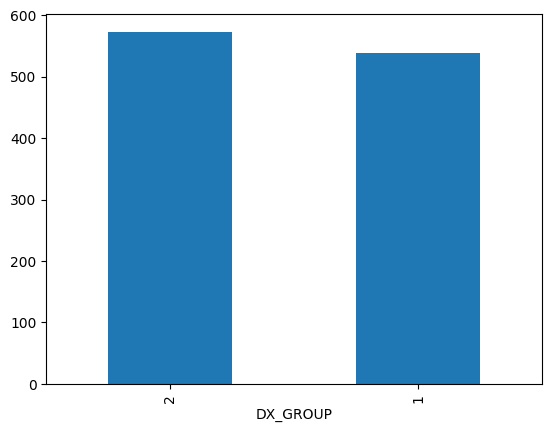

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pheno_data = pd.read_csv('../data/raw/Phenotypic_V1_0b_preprocessed1.csv')
pheno = pd.DataFrame(pheno_data)

print(pheno.describe().T)

# 1 = ASD, 2 = TD
pheno['DX_GROUP'] = pheno['DX_GROUP'].value_counts().plot.bar()

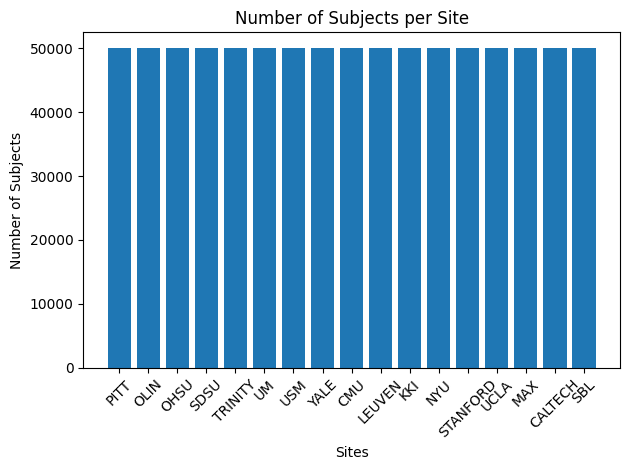

In [99]:
# Sites plotted against num of subjects
site_codes = pheno['SITE_ID'].str.split('_').str[0]
sites = site_codes.unique()

idx = 0
subjects = []

for site in sites:
    if site_codes[idx] == site:
        subjects.append((pheno['subject'][idx])) 
    idx += 1

plt.bar(sites, subjects)
plt.xlabel('Sites')
plt.ylabel('Number of Subjects')
plt.title('Number of Subjects per Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

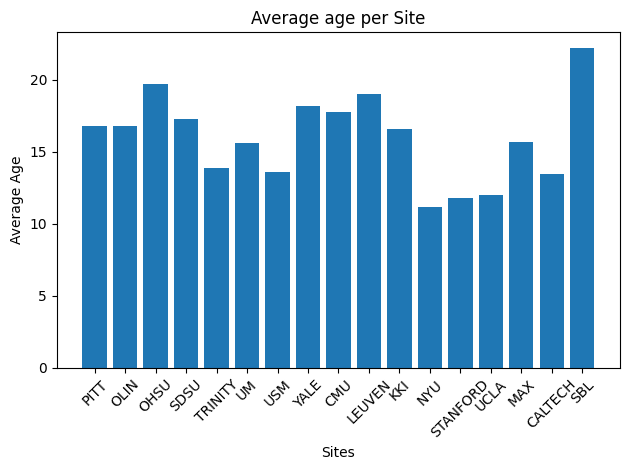

In [100]:
ages = []
prev_sites = set([])
prev_sites.add(site_codes[0])
idx = 1
prev_idx = 0
sum = pheno['AGE_AT_SCAN'][0]
ages.append(sum)

# sum of ages per site
for site in site_codes.sort_values()[1:]:
    if site not in prev_sites:
        ages.append(sum/(idx - prev_idx) if idx - prev_idx > 0 else 0)
        prev_sites.add(site)
        sum = 0
        prev_idx = idx
    sum += pheno['AGE_AT_SCAN'][idx]
    prev_site = site
    idx += 1


plt.bar(sites, ages)
plt.xlabel('Sites')
plt.ylabel('Average Age')
plt.title('Average age per Site')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

0       1
1       1
2       1
3       2
4       1
       ..
1107    1
1108    1
1109    1
1110    2
1111    1
Name: SEX, Length: 1112, dtype: int64


<Axes: xlabel='SEX'>

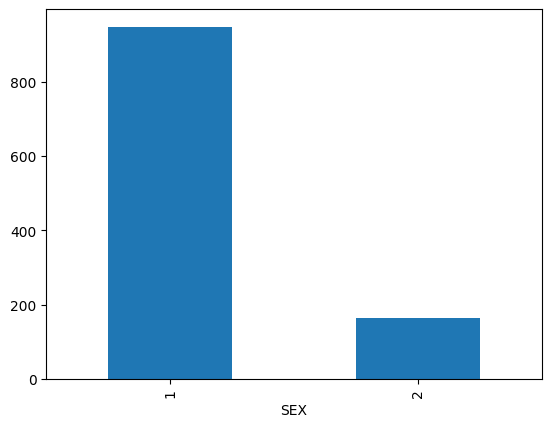

In [101]:
print(pheno["SEX"])

# 1 is male, 2 is female
pheno["SEX"].value_counts().plot.bar()

count    1077.000000
mean     -238.854968
std      1841.858322
min     -9999.000000
25%        98.000000
50%       108.000000
75%       119.000000
max       148.000000
Name: FIQ, dtype: float64

 count    1040.000000
mean      108.380962
std        15.072062
min        41.000000
25%        99.000000
50%       109.000000
75%       119.000000
max       148.000000
Name: FIQ, dtype: float64


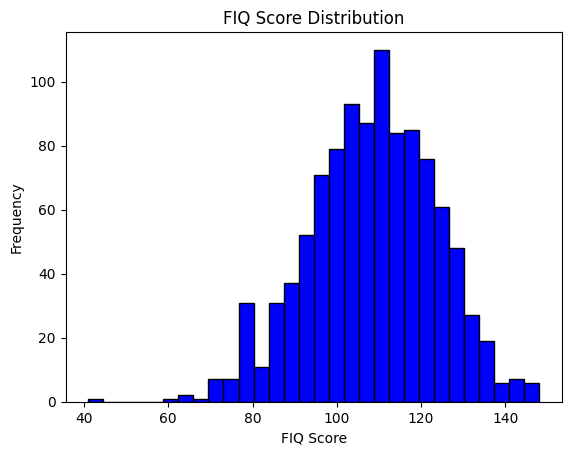

In [102]:
print(pheno["FIQ"].describe().T)

pheno["FIQ"] = pheno["FIQ"].replace(-9999, np.nan)
pheno["FIQ"].dropna(inplace=True)
print("\n", pheno["FIQ"].describe().T)

plt.hist(pheno["FIQ"], bins=30, color='blue', edgecolor='black')
plt.xlabel('FIQ Score')
plt.ylabel('Frequency')
plt.title("FIQ Score Distribution")
plt.show()

In [103]:
pheno.isna().sum().sort_values(ascending=False).head(20)

qc_notes_rater_1             1073
WISC_IV_MATRIX_SCALED        1057
WISC_IV_PRI                  1057
WISC_IV_WMI                  1057
WISC_IV_PSI                  1057
WISC_IV_SIM_SCALED           1057
WISC_IV_VOCAB_SCALED         1057
WISC_IV_BLK_DSN_SCALED       1057
WISC_IV_PIC_CON_SCALED       1057
WISC_IV_INFO_SCALED          1057
WISC_IV_DIGIT_SPAN_SCALED    1057
WISC_IV_LET_NUM_SCALED       1057
WISC_IV_CODING_SCALED        1057
WISC_IV_SYM_SCALED           1057
WISC_IV_VCI                  1057
AQ_TOTAL                     1054
COMORBIDITY                  1053
SRS_MOTIVATION               1048
SRS_COMMUNICATION            1048
SRS_COGNITION                1048
dtype: int64

(1112, 106)
884
Total missing subjects: 0


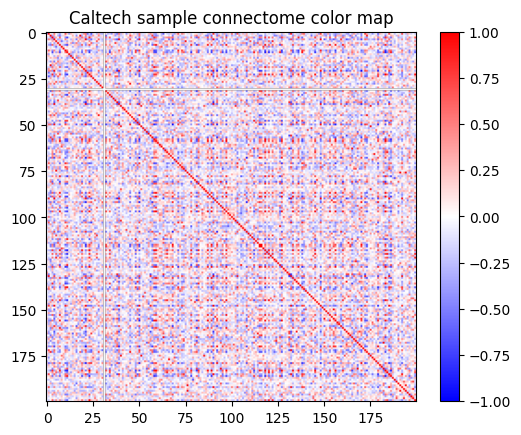

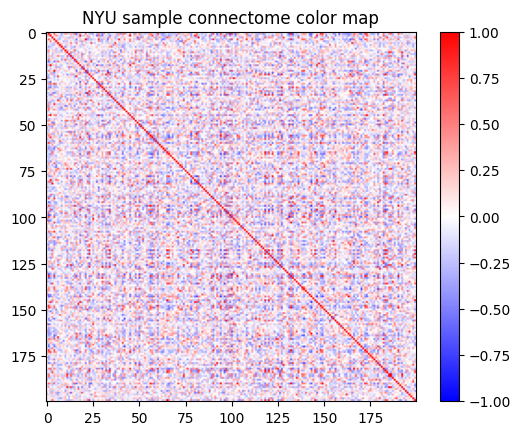

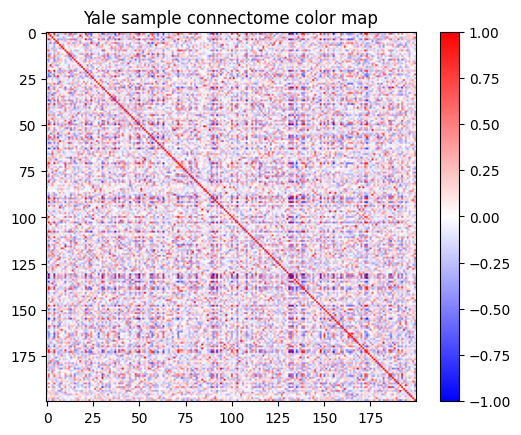

In [117]:
import os
connectomes = os.listdir('../data/interim/connectomes_cc200/')
subjects = sorted([f.split("_rois")[0] for f in connectomes])
pheno_subjects = sorted(pheno['FILE_ID'].astype(str).tolist())

print(pheno.shape)
print(len(connectomes))

# Check for subjects with missing connectomes
missing_count = 0
for subject in subjects:
    if subject not in pheno_subjects:
        print(f"Subject {subject} not found in phenotypic data.")
        print(subject, pheno_subjects[missing_count])
        missing_count += 1
print(f"Total missing subjects: {missing_count}")

# Inpsect sample connectome properties
connectome1 = np.load("../data/interim/connectomes_cc200/Caltech_0051458_rois_cc200.npy")
plt.imshow(connectome1, cmap='bwr', vmin=-1, vmax=1)
plt.title("Caltech sample connectome color map")
plt.colorbar()
plt.show()


connectome1 = np.load("../data/interim/connectomes_cc200/NYU_0050966_rois_cc200.npy")
plt.imshow(connectome1, cmap='bwr', vmin=-1, vmax=1)
plt.title("NYU sample connectome color map")
plt.colorbar()
plt.show()

connectome1 = np.load("../data/interim/connectomes_cc200/Yale_0050558_rois_cc200.npy")
plt.imshow(connectome1, cmap='bwr', vmin=-1, vmax=1)
plt.title("Yale sample connectome color map")
plt.colorbar()
plt.show()